# LAB 6

In [358]:
%pip install torch scikit-learn scipy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


## 1. DANE I MODELE KLASYCZNE

In [359]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd

In [360]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [361]:
models = {
    'Linear': LinearRegression(),
    'Ridge1': Ridge(alpha=1.0),
    'Ridge100': Ridge(alpha=100.0),
    'Lasso': Lasso(alpha=1.0)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R²': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'model': model
    }
    print(f"{name}: R²={results[name]['R²']:.3f}, MSE={results[name]['MSE']:.2f}, MAE={results[name]['MAE']:.2f}")

ridge = results['Ridge100']['model']
feature_importance = ridge.coef_
importance_df = pd.DataFrame({
    'Cecha': feature_names,
    'Waga': feature_importance,
    'Abs_Waga': np.abs(feature_importance)
})
importance_df = importance_df.sort_values(by='Abs_Waga', ascending=False)

residuals = y_test - results['Linear']['model'].predict(X_test)


Linear: R²=0.576, MSE=0.56, MAE=0.53
Ridge1: R²=0.576, MSE=0.56, MAE=0.53
Ridge100: R²=0.581, MSE=0.55, MAE=0.53
Lasso: R²=0.284, MSE=0.94, MAE=0.76


## 2. WIZUALIZACJA

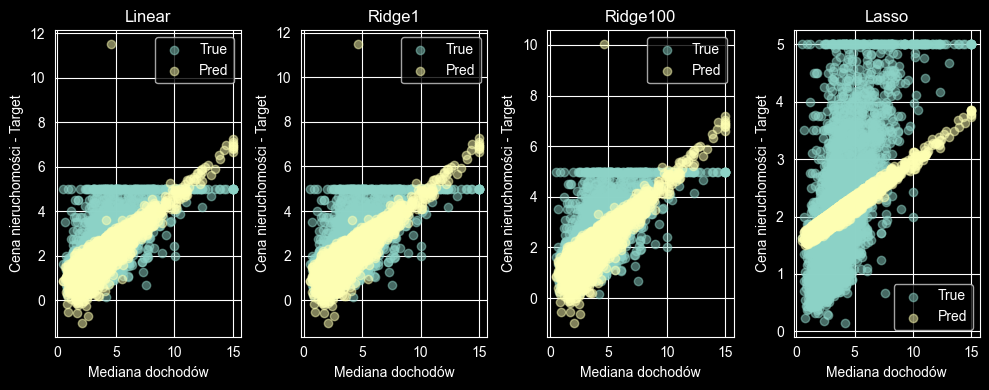

In [362]:
plt.figure(figsize=(10, 4))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(1, 4, i)
    plt.scatter(X_test[:, 0], y_test, alpha=0.5, label='True')
    plt.scatter(X_test[:, 0], res['model'].predict(X_test), alpha=0.5, label='Pred')
    plt.xlabel('Mediana dochodów')
    plt.ylabel('Cena nieruchomości - Target')
    plt.title(name)
    plt.legend()
plt.tight_layout()
plt.show()

Normalizacja i regresje po normalizacji

Linear: R²=0.576, MSE=0.56, MAE=0.53
Ridge1: R²=0.576, MSE=0.56, MAE=0.53
Ridge100: R²=0.578, MSE=0.55, MAE=0.53
Lasso: R²=-0.000, MSE=1.31, MAE=0.91


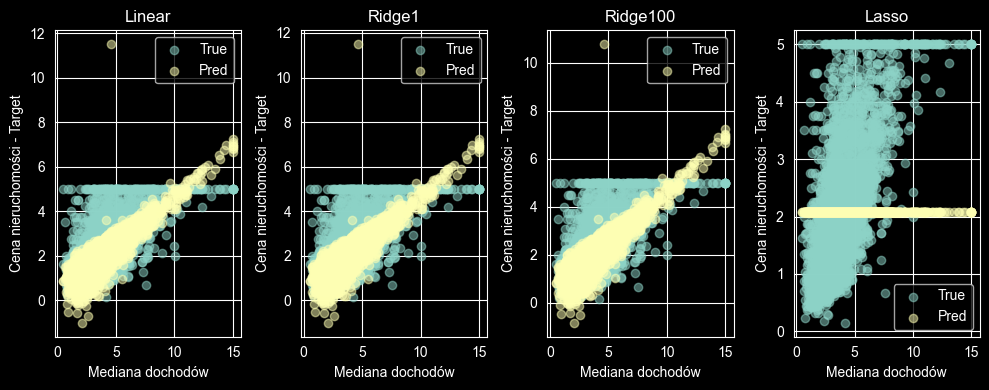

In [363]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear': LinearRegression(),
    'Ridge1': Ridge(alpha=1.0),
    'Ridge100': Ridge(alpha=100.0),
    'Lasso': Lasso(alpha=1.0)
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'R²': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'model': model
    }
    print(f"{name}: R²={results[name]['R²']:.3f}, MSE={results[name]['MSE']:.2f}, MAE={results[name]['MAE']:.2f}")

ridge_scaled = results['Ridge100']['model']
feature_importance = ridge_scaled.coef_
importance_df_scaled = pd.DataFrame({
    'Cecha': feature_names,
    'Waga': feature_importance,
    'Abs_Waga': np.abs(feature_importance)
})

importance_df_scaled = importance_df_scaled.sort_values(by='Abs_Waga', ascending=False)

residuals_n = y_test - results_scaled['Linear']['model'].predict(X_test_scaled)

plt.figure(figsize=(10, 4))
for i, (name, res) in enumerate(results_scaled.items(), 1):
    plt.subplot(1, 4, i)
    plt.scatter(X_test[:, 0], y_test, alpha=0.5, label='True')
    plt.scatter(X_test[:, 0], res['model'].predict(X_test_scaled), alpha=0.5, label='Pred')
    plt.xlabel('Mediana dochodów')
    plt.ylabel('Cena nieruchomości - Target')
    plt.title(name)
    plt.legend()
plt.tight_layout()
plt.show()


## 3. WAŻNOŚĆ CECH

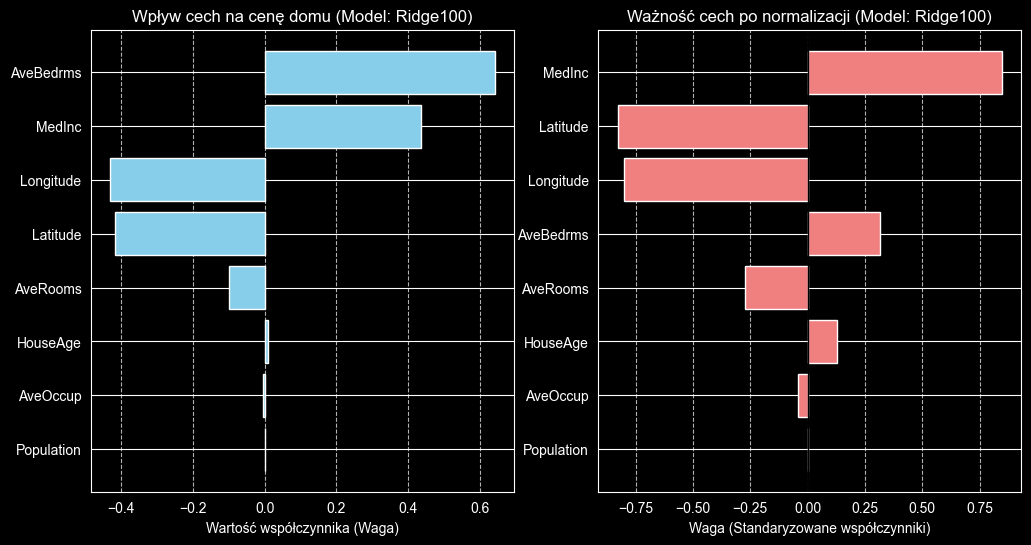

,Cecha,Waga,Abs_Waga
3,AveBedrms,0.641385,0.641385
0,MedInc,0.435354,0.435354
7,Longitude,-0.429779,0.429779
6,Latitude,-0.417740,0.417740
2,AveRooms,-0.098089,0.098089
1,HouseAge,0.009891,0.009891
5,AveOccup,-0.003492,0.003492
4,Population,-0.000002,0.000002


,Cecha,Waga,Abs_Waga
0,MedInc,0.848139,0.848139
6,Latitude,-0.827628,0.827628
7,Longitude,-0.799554,0.799554
3,AveBedrms,0.314804,0.314804
2,AveRooms,-0.274522,0.274522
1,HouseAge,0.129512,0.129512
5,AveOccup,-0.041133,0.041133
4,Population,-0.000024,0.000024


In [364]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(importance_df['Cecha'], importance_df['Waga'], color='skyblue')
plt.xlabel('Wartość współczynnika (Waga)')
plt.title(f'Wpływ cech na cenę domu (Model: Ridge100)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
plt.barh(importance_df_scaled['Cecha'], importance_df_scaled['Waga'], color='lightcoral')
plt.axvline(0, color='black', lw=1)
plt.xlabel('Waga (Standaryzowane współczynniki)')
plt.title('Ważność cech po normalizacji (Model: Ridge100)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

display(importance_df)
display(importance_df_scaled)

## 4. ANALIZA RESZT

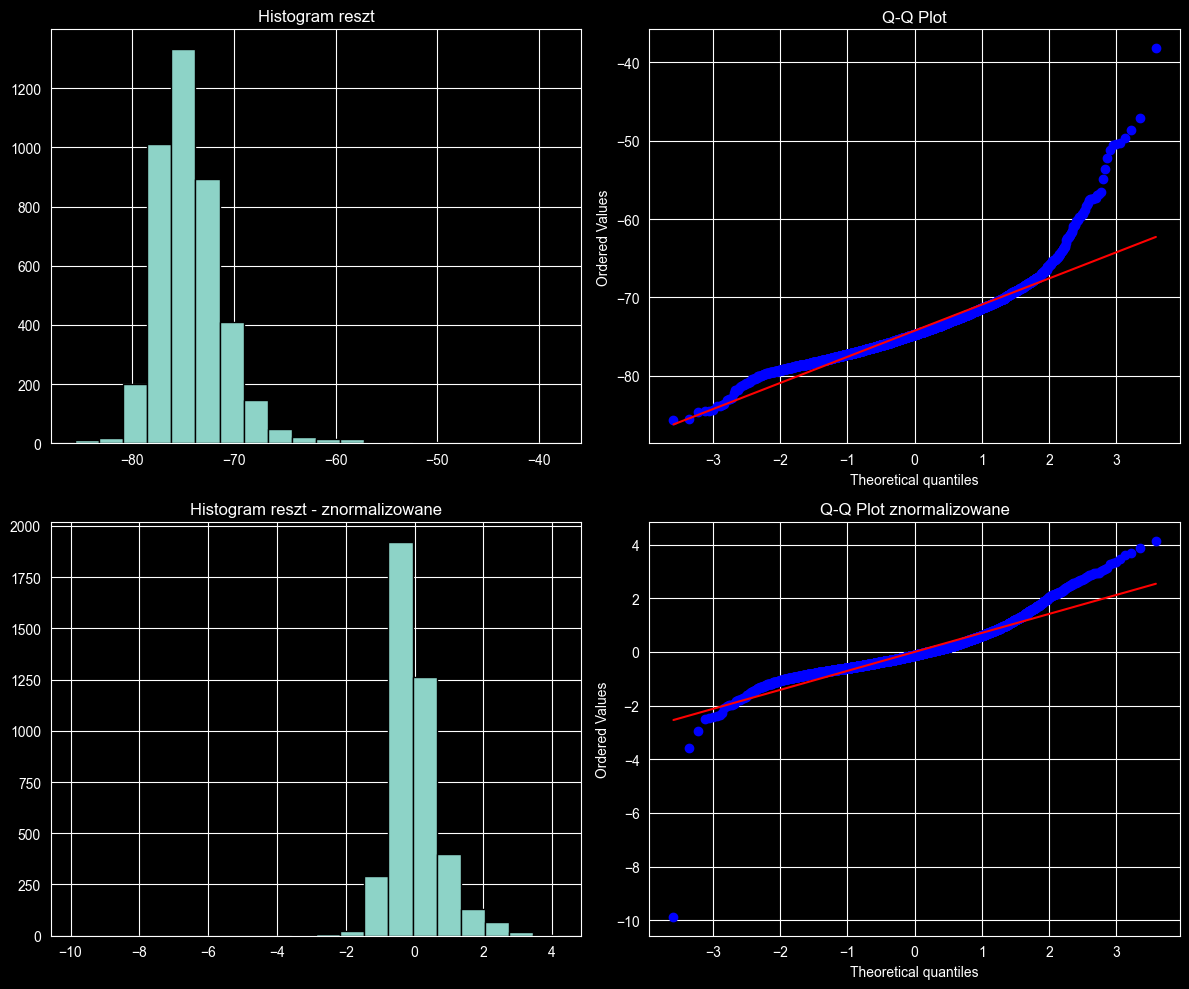


Shapiro-Wilk: stat=0.8921, p=0.0000 (brak normalności)
Durbin-Watson: 0.0045 (brak autokorelacji ≈ 2.0)

Shapiro-Wilk (dane znnormalizowane): stat=0.9022, p=0.0000 (brak normalności)
Durbin-Watson (dane znnormalizowane): 2.0407 (brak autokorelacji ≈ 2.0)


In [368]:
residuals = y_test - results['Linear']['model'].predict(X_test)
residuals_n = y_test - results_scaled['Linear']['model'].predict(X_test_scaled)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram reszt')
plt.subplot(2, 2, 2)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.subplot(2, 2, 3)
plt.hist(residuals_n, bins=20, edgecolor='black')
plt.title('Histogram reszt - znormalizowane')
plt.subplot(2, 2, 4)
from scipy import stats
stats.probplot(residuals_n, dist="norm", plot=plt)
plt.title('Q-Q Plot znormalizowane')
plt.tight_layout()
plt.show()

stat, p = shapiro(residuals)
dw_stat = durbin_watson(residuals)
print(f"\nShapiro-Wilk: stat={stat:.4f}, p={p:.4f} {'(normalność OK)' if p > 0.05 else '(brak normalności)'}")
print(f"Durbin-Watson: {dw_stat:.4f} (brak autokorelacji ≈ 2.0)")

stat_n, p_n = shapiro(residuals_n)
dw_stat_n = durbin_watson(residuals_n)
print(f"\nShapiro-Wilk (dane znnormalizowane): stat={stat_n:.4f}, p={p:.4f} {'(normalność OK)' if p_n > 0.05 else '(brak normalności)'}")
print(f"Durbin-Watson (dane znnormalizowane): {dw_stat_n:.4f} (brak autokorelacji ≈ 2.0)")

## 5. SIEĆ NEURONOWA - PYTORCH

Epoch 20/200, Train Loss: 0.2033, Val Loss: 0.2152
Epoch 40/200, Train Loss: 0.1852, Val Loss: 0.2142
Epoch 60/200, Train Loss: 0.1789, Val Loss: 0.2053
Epoch 80/200, Train Loss: 0.1749, Val Loss: 0.2000
Epoch 100/200, Train Loss: 0.1749, Val Loss: 0.2230
Epoch 120/200, Train Loss: 0.1693, Val Loss: 0.2186
Epoch 140/200, Train Loss: 0.1661, Val Loss: 0.2133
Epoch 160/200, Train Loss: 0.1636, Val Loss: 0.2207
Epoch 180/200, Train Loss: 0.1591, Val Loss: 0.2112
Epoch 200/200, Train Loss: 0.1590, Val Loss: 0.2138

Sieć neuronowa MAE: 0.307


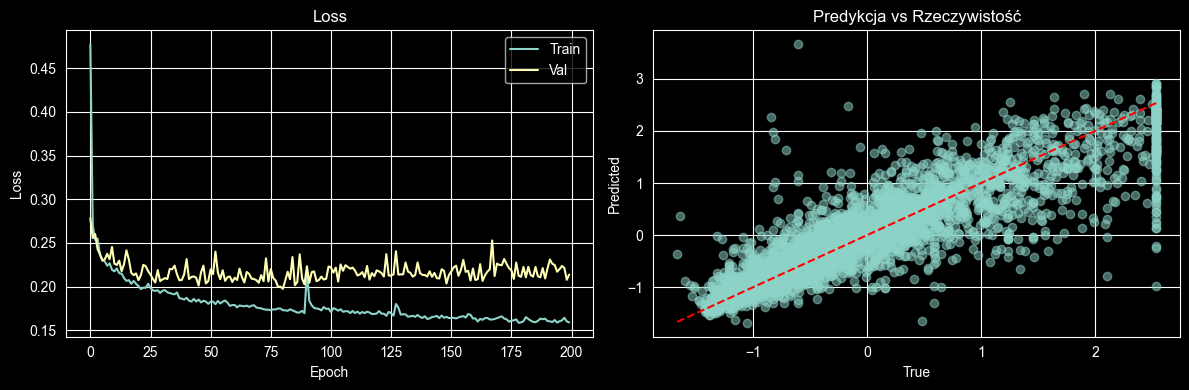

In [366]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x.squeeze()

model = RegressionNN(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_test_tensor)
        val_loss = criterion(val_pred, y_test_tensor)

    train_losses.append(epoch_loss / len(train_loader))
    val_losses.append(val_loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_mae = torch.mean(torch.abs(predictions - y_test_tensor))
    print(f"\nSieć neuronowa MAE: {test_mae:.3f}")

# Wizualizacja
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.scatter(y_test_scaled, predictions.numpy(), alpha=0.5)
plt.plot([y_test_scaled.min(), y_test_scaled.max()],
         [y_test_scaled.min(), y_test_scaled.max()], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Predykcja vs Rzeczywistość')
plt.tight_layout()
plt.show()

## 6. POJĘCIA

In [367]:
n_samples = len(X_train)
batch_size = 32
iterations_per_epoch = int(np.ceil(n_samples / batch_size))
print(f"\n=== BATCH SIZE, EPOCH, ITERATION ===")
print(f"Próbek: {n_samples}, Batch: {batch_size}, Epok: {epochs}")
print(f"Iteracji/epoka: {iterations_per_epoch}")
print(f"Łącznie iteracji: {iterations_per_epoch * epochs}")


=== BATCH SIZE, EPOCH, ITERATION ===
Próbek: 16512, Batch: 32, Epok: 200
Iteracji/epoka: 516
Łącznie iteracji: 103200
